<a href="https://colab.research.google.com/github/kush2863/ml/blob/main/Assignment_4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group A: Machine Learning
## Assignment 1

## Kush Agrawal
## TEITA04
### Clustering

## Step 1: Data Exploration and Preprocessing

### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

### Load your customer dataset.

In [ ]:
df= pd.read_csv("/Mall_Customers - Mall_Customers.csv")

### Read the first and last n rows of a dataset.

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Find Shape of a dataset.

In [ ]:
df.shape

(200, 5)

### Check data types

In [ ]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


### Print information about a DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Provide descriptive statistics for dataset

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check for missing values.

No missing values sed :(
  

### Handle missing values (impute or drop).

### Check Duplicates

In [ ]:
df.duplicated().sum()

0

### Check no of unique values for each column

In [ ]:
df.nunique()

,0
CustomerID,200
Genre,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


### Drop features containing unique values

In [ ]:

df = df.drop('CustomerID', axis=1)


In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Checking Outliers

<Axes: >

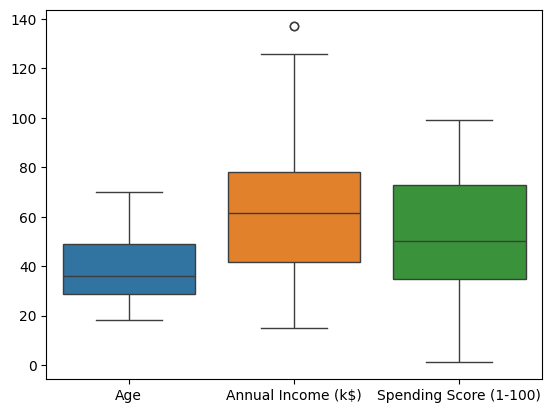

In [ ]:
sns.boxplot(df)


In [ ]:
df[df['Annual Income (k$)']>125]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


## Step 2: Data Visualization

### Check distribution of Annual Income

<ipython-input-21-5c9bfeb4bab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

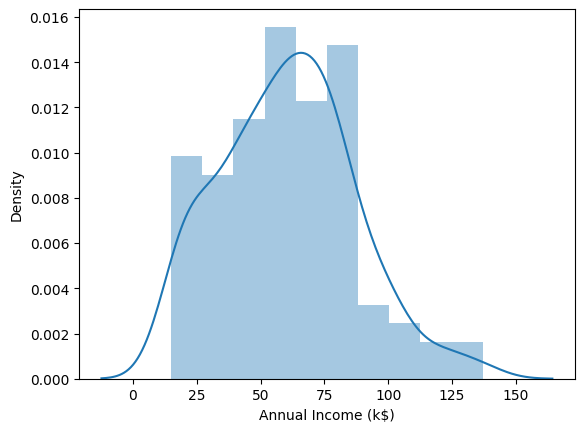

In [ ]:
sns.distplot(df['Annual Income (k$)'])


In [ ]:
## Annual income is normally distributed
df['Annual Income (k$)'].skew()

0.3218425498619055

### Check distribution of Age

<ipython-input-23-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

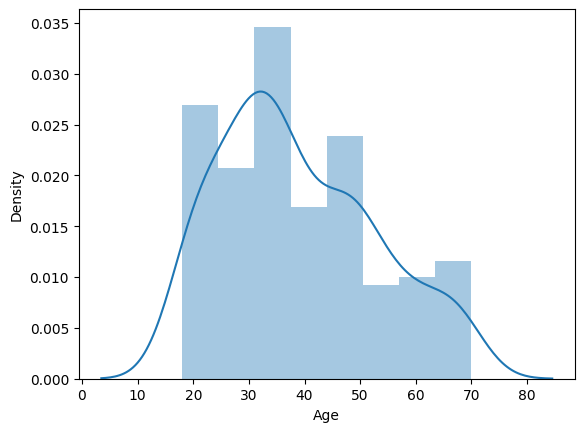

In [ ]:
sns.distplot(df['Age'])

In [ ]:
df['Age'].skew()
##Normally distributed

0.48556885096681657

### Check distribution of Spending score

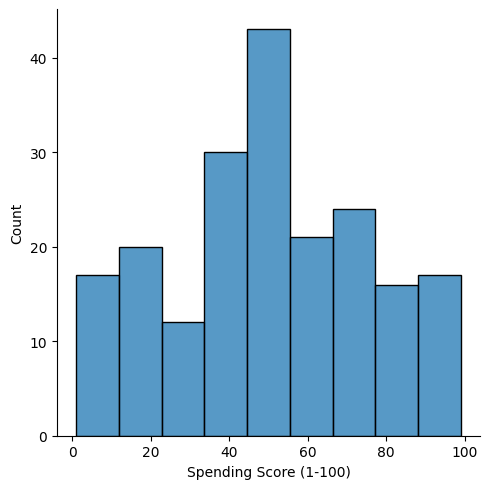

In [ ]:
sns.displot(df['Spending Score (1-100)'])

In [ ]:
df['Spending Score (1-100)'].skew()
##Normally Distributed

-0.047220201374263374

### Check distribution of Genre

<Axes: xlabel='count', ylabel='Genre'>

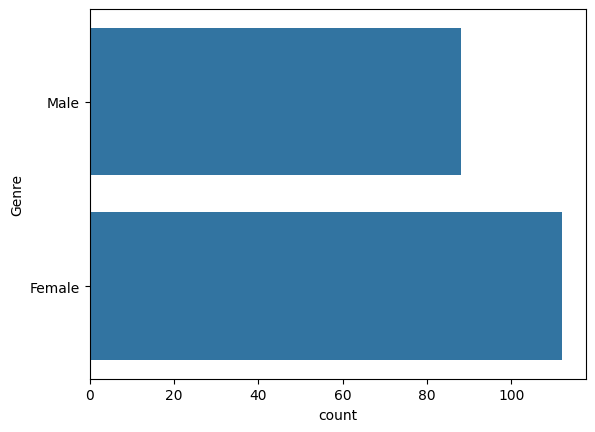

In [ ]:
df['Genre'].value_counts()
sns.countplot(df['Genre'])

### Determine a dataset is balanced or imbalanced

<Axes: xlabel='count', ylabel='Genre'>

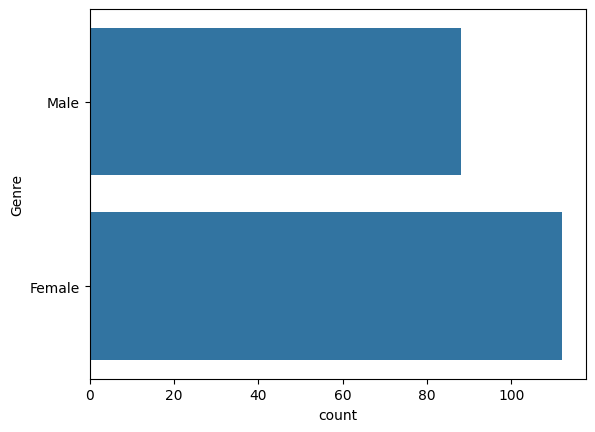

In [ ]:
sns.countplot(df['Genre'])

### Check the relationship between variables Annual Income, Spending score and Gender

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

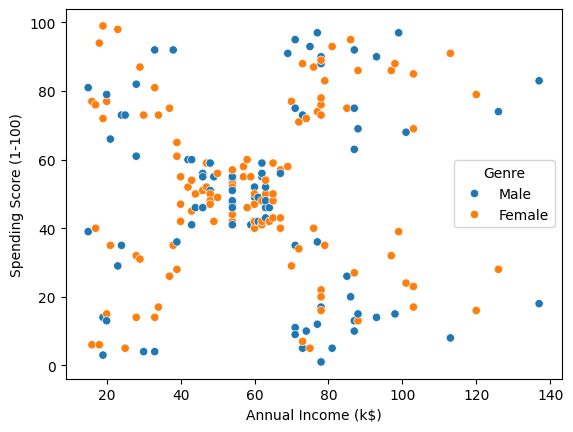

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Genre',data=df)
## multivary Data analysis

## Step 3: Preprocess the data by scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, 1:]=scaler.fit_transform(df[['Annual Income (k$)','Age','Spending Score (1-100)']])


In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.738999,-1.424569,-0.434801
1,Male,-1.738999,-1.281035,1.195704
2,Female,-1.700830,-1.352802,-1.715913
3,Female,-1.700830,-1.137502,1.040418
4,Female,-1.662660,-0.563369,-0.395980


## Step 4: Select the relevant features

Apply categorical feature to transform the genre


In [ ]:
corr=df.corr(numeric_only=True)

<Axes: >

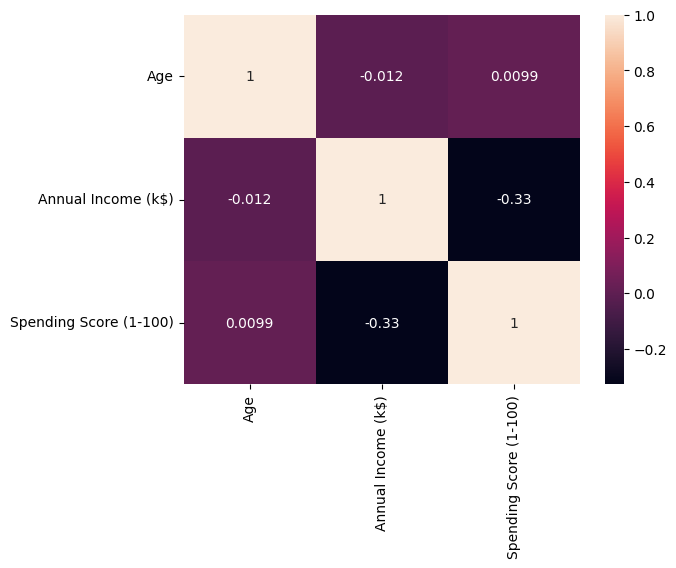

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])
df.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.738999,-1.424569,-0.434801
1,1,-1.738999,-1.281035,1.195704
2,0,-1.700830,-1.352802,-1.715913


## Step 5:optimal number of clusters using techniques like the elbow method and then apply k-mean clustering algorithm

### K-means clustering

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wcss_list = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

<Axes: >

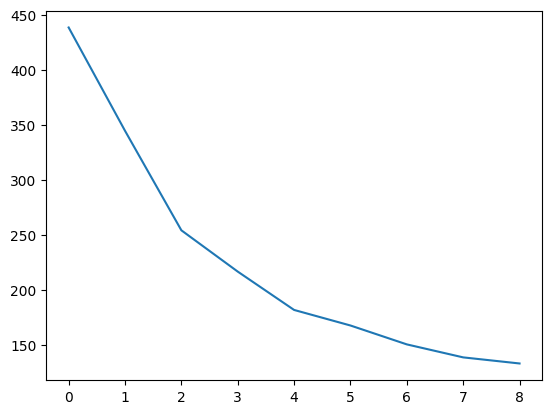

In [ ]:
sns.lineplot(wcss_list)


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    score=silhouette_score(df,labels)
    silhouette_scores.append(score)

<Axes: >

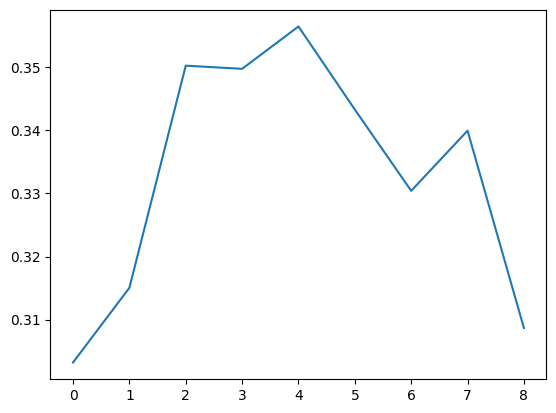

In [ ]:
sns.lineplot(silhouette_scores)

### How does K-means work?

In [ ]:
 pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0


## Step 6: Apply K-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_cluster = 6
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
df['clusters'] =kmeans.fit_predict(df)

In [ ]:
df.head(200)

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,-1.738999,-1.424569,-0.434801,4
1,1,-1.738999,-1.281035,1.195704,4
2,0,-1.700830,-1.352802,-1.715913,2
3,0,-1.700830,-1.137502,1.040418,4
4,0,-1.662660,-0.563369,-0.395980,2
...,...,...,...,...,...
195,0,2.268791,-0.276302,1.118061,1
196,0,2.497807,0.441365,-0.861839,3
197,1,2.497807,-0.491602,0.923953,1
198,1,2.917671,-0.491602,-1.250054,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

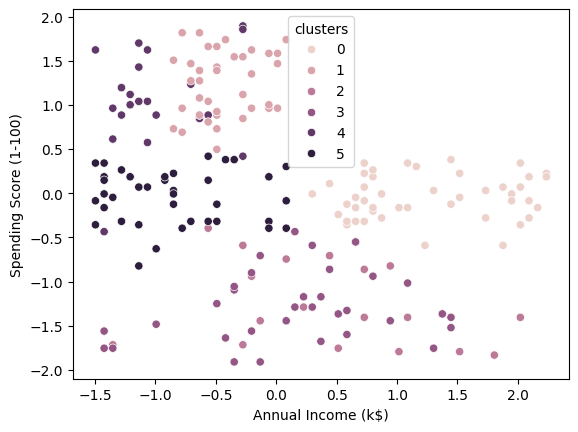

In [ ]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='clusters',data=df)